## Reading file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Clustering Assignment"

Country-data.csv  data-dictionary+.csv


## Adding Required Libraries as per requirement

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading & Understanding Data

####Reading Data Dictionary File

In [ ]:
df_structure = pd.read_csv('/content/drive/My Drive/Clustering Assignment/data-dictionary+.csv')

df_structure.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


####Reading Country File

In [ ]:
df_country = pd.read_csv('/content/drive/My Drive/Clustering Assignment/Country-data.csv')

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df_country.shape

(167, 10)

In [ ]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Data Cleaning

### Basic Cleaning

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = df_country.isna().mean()*100
df_null

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

No null values present -> no dropping required.

In [ ]:
# Datatype check for the dataframe

df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

No inconsistent datatypes present -> no conversion is required.

In [ ]:
# Duplicates check

df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [ ]:
# Segregation of Numerical and Categorical Variables/Columns

categ_col = df_country.select_dtypes(include = ['object']).columns
numer_col = df_country.select_dtypes(exclude = ['object']).columns

The dataset seems to be almost clean and hence no cleaning required.

### Checking Outliers

In [ ]:
df_country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### Checking for 'child_mort' field

In [ ]:
df_country['child_mort'].value_counts(bins=10).sort_index()

(2.394, 23.14]      90
(23.14, 43.68]      23
(43.68, 64.22]      19
(64.22, 84.76]       9
(84.76, 105.3]      10
(105.3, 125.84]     10
(125.84, 146.38]     2
(146.38, 166.92]     3
(166.92, 187.46]     0
(187.46, 208.0]      1
Name: child_mort, dtype: int64

In [ ]:
round(df_country['child_mort'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    167.00
mean      38.27
std       40.33
min        2.60
25%        8.25
50%       19.30
75%       62.10
90%      100.22
99%      153.40
100%     208.00
max      208.00
Name: child_mort, dtype: float64

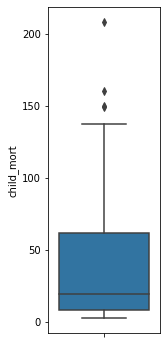

In [ ]:
# Outlier Mapping

plt.figure(figsize=(2,6))
sns.boxplot(df_country.child_mort, orient="v")
plt.show()

#### Checking for 'income' field

In [ ]:
df_country['income'].value_counts(bins=10).sort_index()

(484.608, 13048.1]      95
(13048.1, 25487.2]      33
(25487.2, 37926.3]      16
(37926.3, 50365.4]      15
(50365.4, 62804.5]       3
(62804.5, 75243.6]       2
(75243.6, 87682.7]       1
(87682.7, 100121.8]      1
(100121.8, 112560.9]     0
(112560.9, 125000.0]     1
Name: income, dtype: int64

In [ ]:
round(df_country['income'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count       167.00
mean      17144.69
std       19278.07
min         609.00
25%        3355.00
50%        9960.00
75%       22800.00
90%       41220.00
99%       84374.00
100%     125000.00
max      125000.00
Name: income, dtype: float64

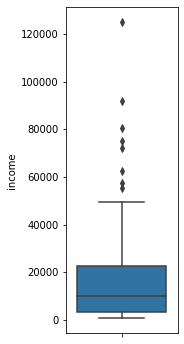

In [ ]:
# Outlier Mapping

plt.figure(figsize=(2,6))
sns.boxplot(df_country.income, orient="v")
plt.show()

#### Checking for 'gdpp' field

In [ ]:
df_country['gdpp'].value_counts(bins=10).sort_index()

(126.22999999999999, 10707.9]    113
(10707.9, 21184.8]                21
(21184.8, 31661.7]                 8
(31661.7, 42138.6]                 9
(42138.6, 52615.5]                11
(52615.5, 63092.4]                 1
(63092.4, 73569.3]                 1
(73569.3, 84046.2]                 1
(84046.2, 94523.1]                 1
(94523.1, 105000.0]                1
Name: gdpp, dtype: int64

In [ ]:
round(df_country['gdpp'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count       167.00
mean      12964.16
std       18328.70
min         231.00
25%        1330.00
50%        4660.00
75%       14050.00
90%       41840.00
99%       79088.00
100%     105000.00
max      105000.00
Name: gdpp, dtype: float64

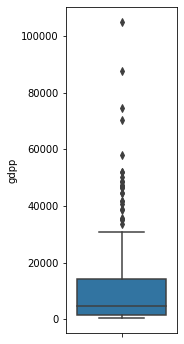

In [ ]:
# Outlier Mapping

plt.figure(figsize=(2,6))
sns.boxplot(df_country.gdpp, orient="v")
plt.show()

Conclusion : There seems to be FEW OUTLIERS, but these seems to be genuine values, so we will not remove them, and keep it for our further analysis


In [ ]:
df_country.shape

(167, 10)

## EDA

### Data Visualisation

(9.5, -0.5)

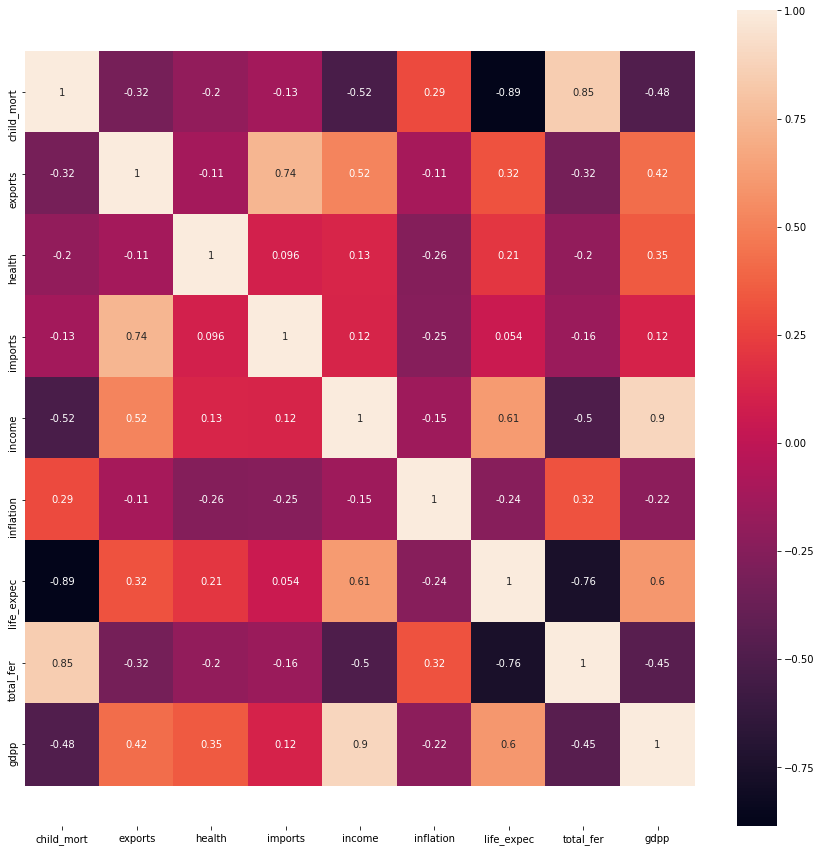

In [ ]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,15))        
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Inference:**

* child_mortality and life_expentency are highly correlated with correlation of -0.89

* child_mortality and total_fertility are highly correlated with correlation of 0.85

* imports and exports are highly correlated with correlation of 0.74

* life_expentency and total_fertility are highly correlated with correlation of - -0.76

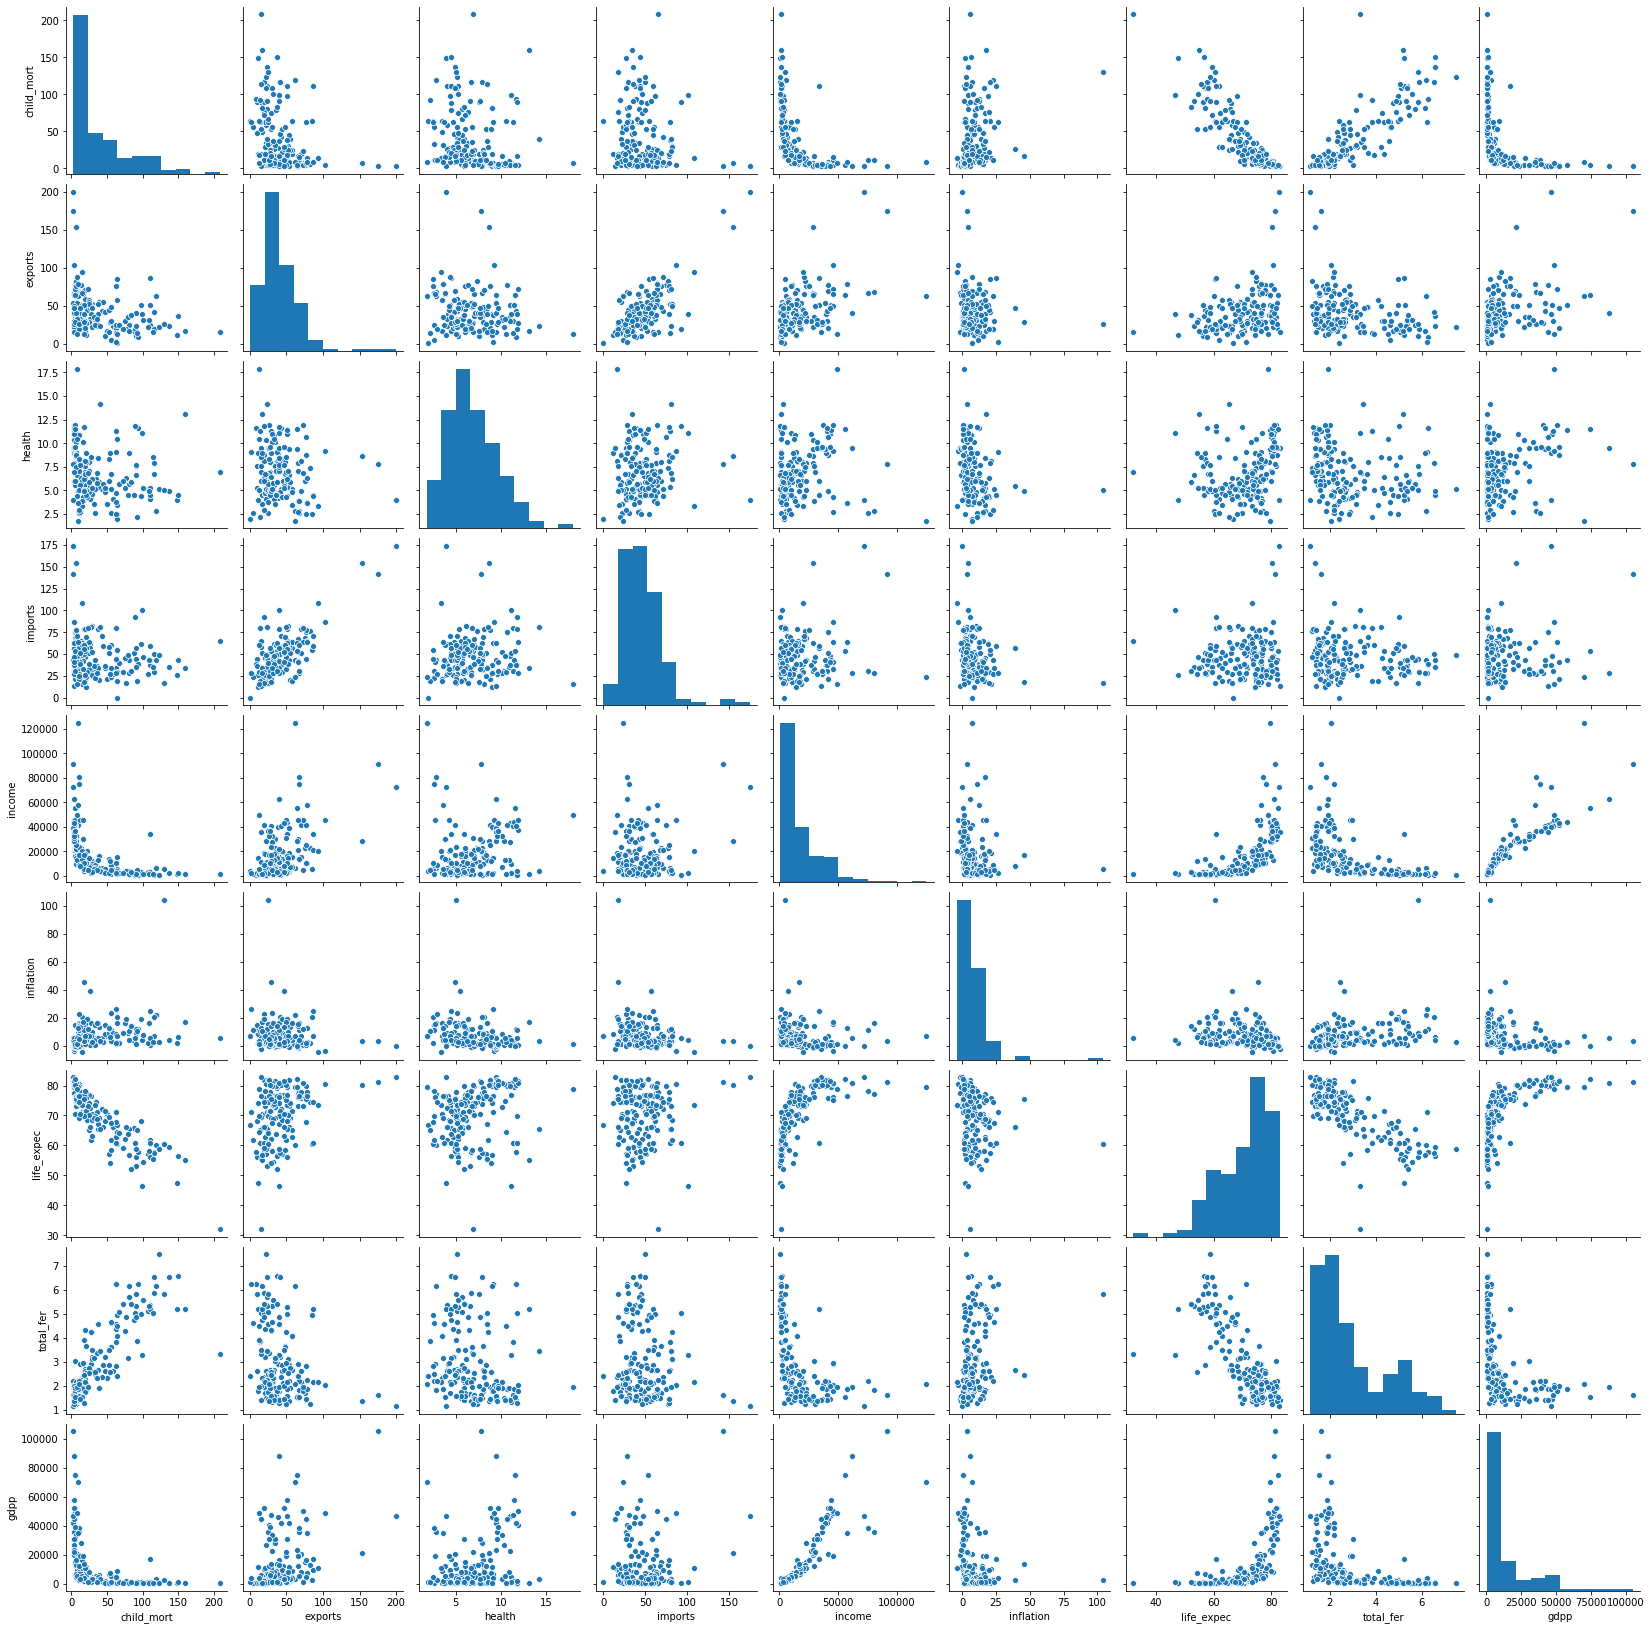

In [ ]:
# Pairplot of all numeric columns

sns.pairplot(df_country)

### Scaling the data

In [ ]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
# New dataframe with only Numeric variables, for scaling

country_new=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()

In [ ]:
country_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [ ]:
country_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Rescaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# instantiate
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(country_new)
country_scaled.shape

(167, 9)

In [ ]:
country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
#Converting it into a dataframe

country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'imports_abs', 'exports_abs', 'health_abs']
country_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports_abs,exports_abs,health_abs
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Hopkins Statistics

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency.

To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_scaled)

0.8474250015044724

Insight: Hopkins Statistic of almost .85 is a good score that indicated that the data is good for cluster analysis.

### Modelling

### Hierarchical Clustering
As mentioned in the 'Approach' section, we will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)

In [ ]:
country_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports_abs,exports_abs,health_abs
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


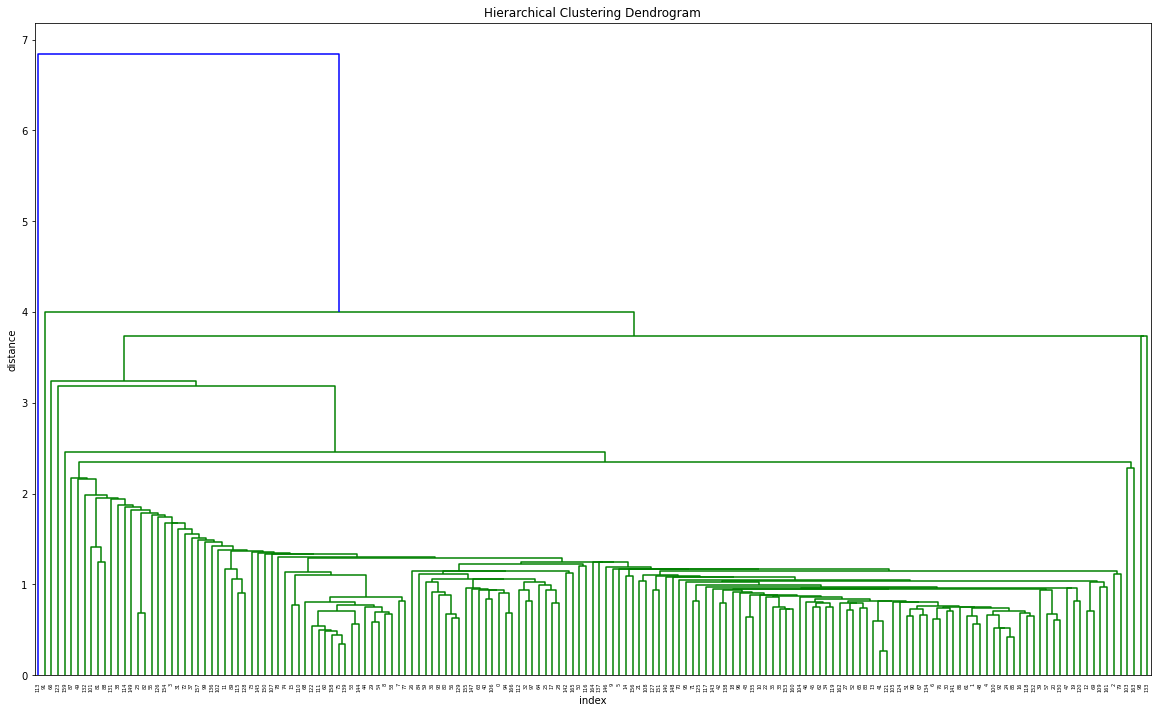

In [ ]:
# single linkage
plt.figure(figsize=(20, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

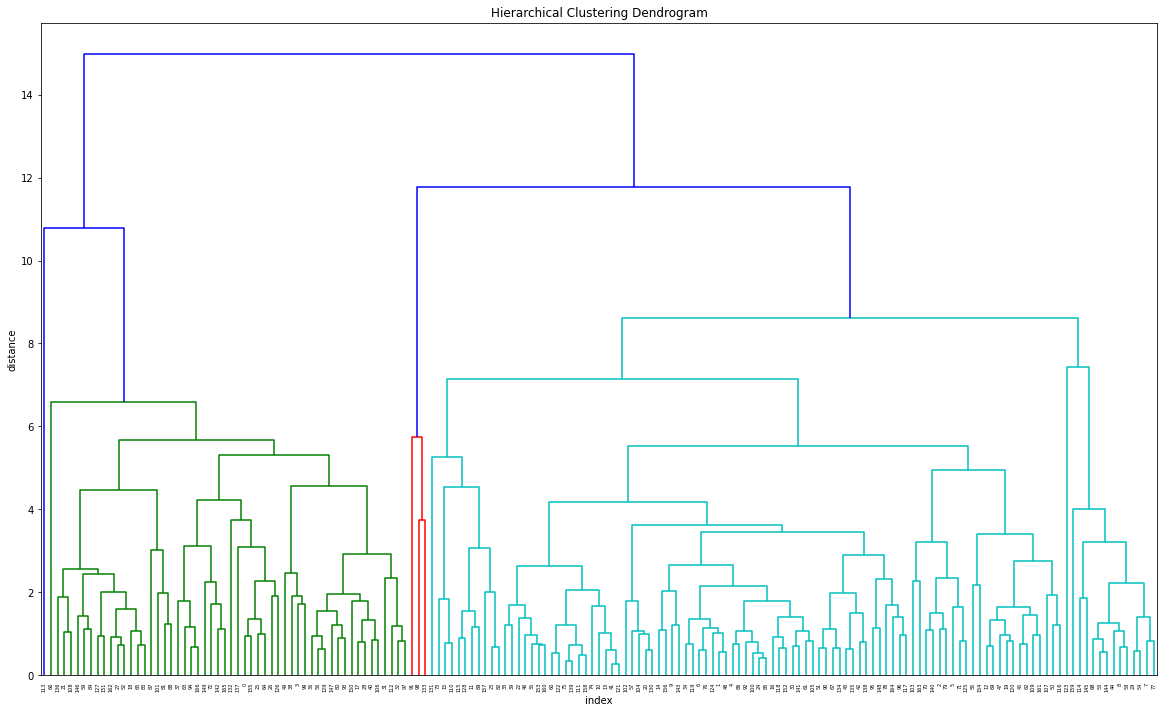

In [ ]:
# complete linkage
plt.figure(figsize=(20, 12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

**NOTE:** 

From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

### **First Iteration - Using 3 Clusters**

In [ ]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Create a new datafame with cluster labels to it.
country_x = df_country.copy()
country_x['cluster_labels_3'] = cluster_labels_3

country_x.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [ ]:
country_x.shape

(167, 11)

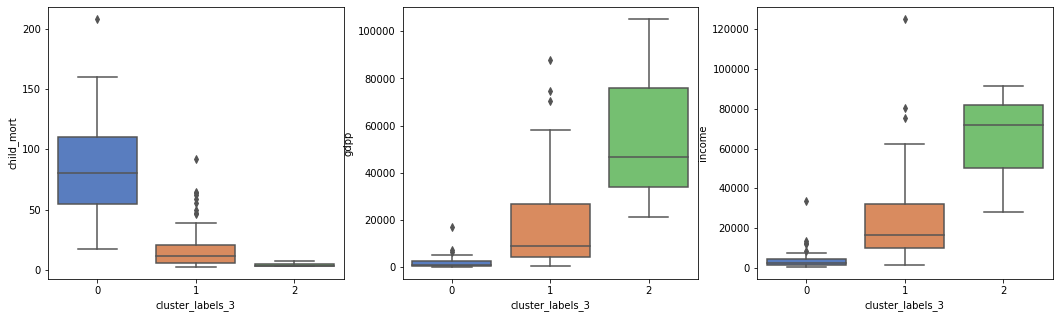

In [ ]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=country_x, palette="muted")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=country_x, palette="muted")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=country_x, palette="muted")

plt.show()

In [ ]:
country_x.cluster_labels_3.value_counts()

1    109
0     55
2      3
Name: cluster_labels_3, dtype: int64

### **Second Iteration - Using 4 Clusters**

In [ ]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
country_x['cluster_labels_4'] = cluster_labels_4

country_x.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


In [ ]:
country_x.shape

(167, 12)

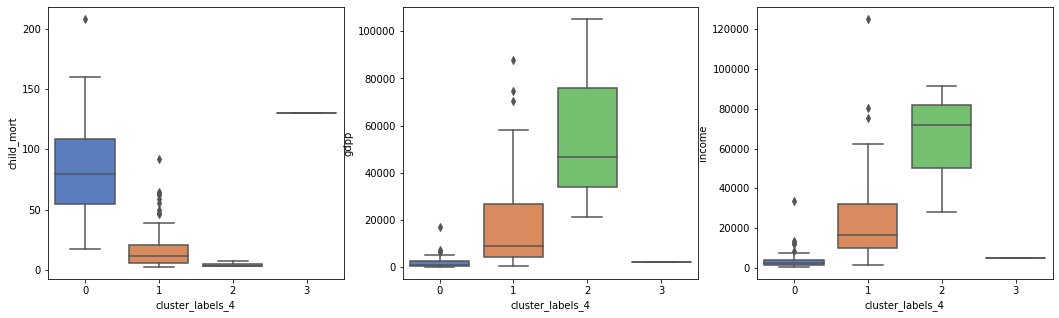

In [ ]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=country_x, palette="muted")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=country_x, palette="muted")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=country_x, palette="muted")

plt.show()

In [ ]:
country_x.cluster_labels_4.value_counts()

1    109
0     54
2      3
3      1
Name: cluster_labels_4, dtype: int64

**INSIGHT:** 

From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters. We will further validate with other methods below.

### Finding the Optimal Number of Clusters

**SSD (Elbow Curve)**

In [ ]:
#Checking the dataframe
country_scaled.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports_abs,exports_abs,health_abs
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
country_scaled.shape

(167, 9)

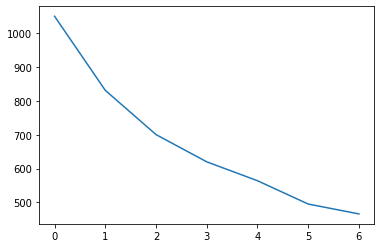

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

*  The value of the silhouette score range lies between -1 to 1.

*  A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

*  A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
from sklearn.metrics import silhouette_score

# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2873566892140671
For n_clusters=3, the silhouette score is 0.28329575683463126
For n_clusters=4, the silhouette score is 0.29750893814718204
For n_clusters=5, the silhouette score is 0.30440779730752227
For n_clusters=6, the silhouette score is 0.22799367131601095
For n_clusters=7, the silhouette score is 0.22446614769489626
For n_clusters=8, the silhouette score is 0.21898779873452212


INSIGHT: From the above validations(Elbow Curve & silhouette analysis), we could see that 3 or 4 clusters are optimal number of clusters to be used. We will try 2 different iterations in K-Means clustering using 2 and 3 Clusters and analyse the results.

## K-Means Clustering

In [ ]:
# help(KMeans)

### First Iteration - Using 3 Clusters

In [ ]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [ ]:
kmeans_3.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
# Create a new datafame with scaled data and adding country name to it.
country_x = country_x.copy()
country_x.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


In [ ]:
country_x.shape

(167, 12)

In [ ]:
# assign the label
country_x['cluster_id_3'] = kmeans_3.labels_
country_x.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,2


In [ ]:
# Checking the number of countries in each cluster

country_x.cluster_id_3.value_counts()

2    84
1    47
0    36
Name: cluster_id_3, dtype: int64

### Visualizing the Clustered Data

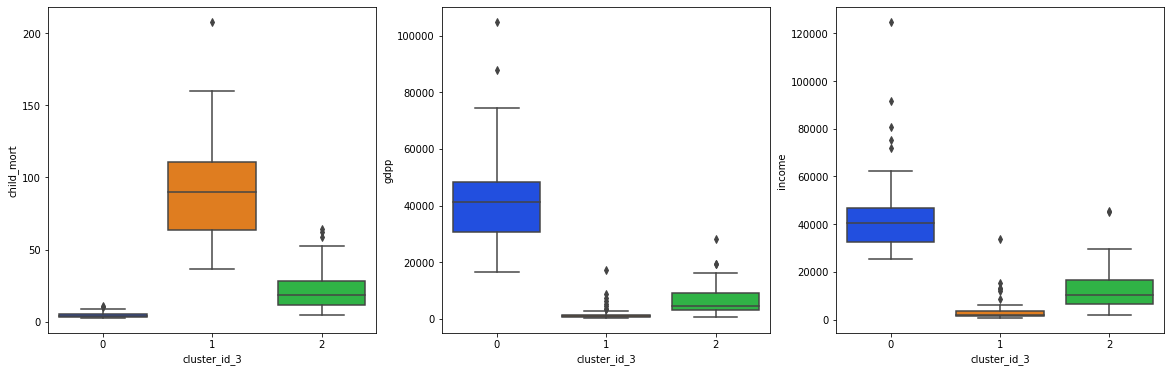

In [ ]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=country_x, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=country_x, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=country_x, palette="bright")

plt.show()

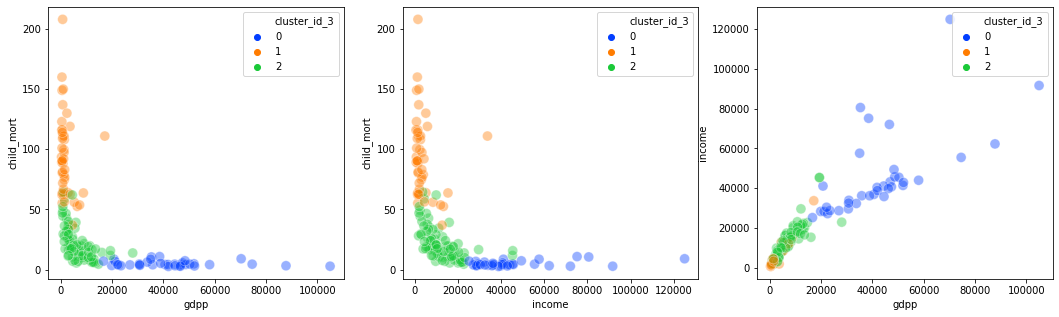

In [ ]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

###Second Iteration - Using 4 Clusters

In [ ]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [ ]:
kmeans_4.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
# assign the label
country_x['cluster_id_4'] = kmeans_4.labels_
country_x.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,2,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,2,1


In [ ]:
# Checking the number of countries in each cluster

country_x.cluster_id_4.value_counts()

1    87
0    47
2    30
3     3
Name: cluster_id_4, dtype: int64

### **Visualizing the Clustered Data**

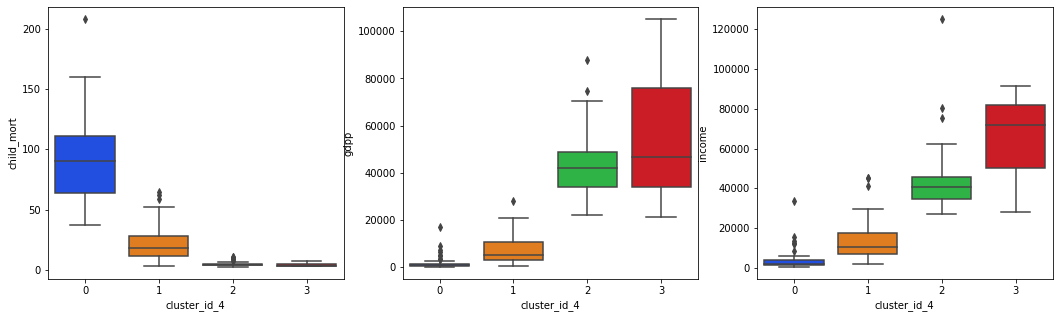

In [ ]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=country_x, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=country_x, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=country_x, palette="bright")

plt.show()

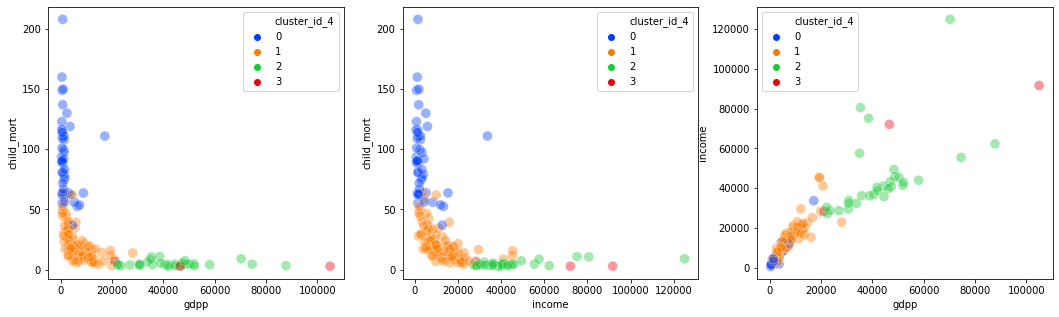

In [ ]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=country_x, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

###Choosing the model

From the above 2 Iterations of K-Means, we could see that using 4 Clusters provided a cleaner output. So we will consider the 'K-Means with 4 Clusters' as BEST MODEL

### **Interpreting the Clusters from K-Means model**

In [ ]:
#New dataframe for group by & analysis
country_x_analysis =  country_x.groupby(['cluster_id_4']).mean()
country_x_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.063830,0.127660,1.000000
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.873563,0.873563,1.931034
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,1.000000,1.000000,0.000000
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000,2.000000,0.000000


In [ ]:
# Creating a new field for count of observations in each cluster
country_x_analysis['Observations']=country_x[['cluster_id_4','child_mort']].groupby(['cluster_id_4']).count()
country_x_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,Observations
cluster_id_4,,,,,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.063830,0.127660,1.000000,47
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.873563,0.873563,1.931034,87
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,1.000000,1.000000,0.000000,30
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000,2.000000,0.000000,3


In [ ]:
# Creating a new field for proportion of observations in each cluster
country_x_analysis['Proportion']=round(country_x_analysis['Observations']/country_x_analysis['Observations'].sum(),2)
country_x_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,Observations,Proportion
cluster_id_4,,,,,,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.063830,0.127660,1.000000,47,0.28
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.873563,0.873563,1.931034,87,0.52
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,1.000000,1.000000,0.000000,30,0.18
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000,2.000000,0.000000,3,0.02


**Interpretation of Clusters:**

Cluster 0 has the Highest average Child Mortality rate of **~93** when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 1922 & 3942 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of **~28%** of overall data, and has **~47** observations in comparision to 167 total observations ---

### Renaming the Clusters

In [ ]:
country_x_analysis = country_x_analysis.rename({
    0: 'Under Developed Countries',
    1: 'Developing Countries',
    2: 'Developed Countries_2',
    3: 'Developed Countries_1'}).reset_index()

country_x_analysis

,cluster_id_4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,Observations,Proportion
0,Under Developed Countries,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.063830,0.127660,1.000000,47,0.28
1,Developing Countries,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.873563,0.873563,1.931034,87,0.52
2,Developed Countries_2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,1.000000,1.000000,0.000000,30,0.18
3,Developed Countries_1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000,2.000000,0.000000,3,0.02


**# ngo_country_k_analysis[['cluster_id_4','child_mort','income','gdpp','Observations','Proportion']]**

**Final Cluster:**

Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 3 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

### **Analysing the 'Under Developed Countries' Cluster** 

In [ ]:
country_x.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4'],
      dtype='object')

In [ ]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data 

result_cluster = country_x[country_x['cluster_id_4'] == 0].copy()
result_cluster = result_cluster[['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4']]

# result_cluster.sort_values(['child_mort', 'income', 'gdpp'], ascending=False)

### **Under_Developed_Countries cluster view**

In [ ]:
# Dataframe view of Final Cluster
result_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,1,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0,1,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,0,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0,0,1,0


### **Cluster Mean**

In [ ]:
# Mean values for the Cluster id 0 ('Under Developed Countries')

result_cluster_mean=result_cluster.groupby(['cluster_id_4']).mean()
    
result_cluster_mean=result_cluster_mean.rename({0:'Under Developed Countries'}).reset_index()
result_cluster_mean

,cluster_id_4,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3
0,Under Developed Countries,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.06383,0.12766,1


### **Fetching the final data based on Cluster Means**

#### **Data greater than average child mortality rate**

**NOTE:** 

We could see that the Mean values of Child Mortality for 'Under Developed Countries' is ~93. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 93.

In [ ]:
# We create a new dataframe to store the countries satisfying the cluster mean from original dataframe

Under_Developed_Countries = df_country[df_country['child_mort'] >= 93].copy()
Under_Developed_Countries=Under_Developed_Countries.sort_values(['child_mort', 'income', 'gdpp'], ascending=False)
Under_Developed_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334


In [ ]:
Under_Developed_Countries.shape

(20, 10)

#### **Data less than average gdpp rate**

NOTE: We could see that the Mean values of gdpp for 'Under Developed Countries' is ~1922. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 1922.

In [ ]:
# We create a new dataframe that will have the final set of countries which will be 
# proposed to the CEO of the NGO as Countries requiring financial support.

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 1922]
Under_Developed_Countries.sort_values(['child_mort', 'income', 'gdpp'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220


In [ ]:
Under_Developed_Countries.shape

(17, 10)

Data less than average income rate

In [ ]:
# NOTE: We could see that the Mean values of income for 'Under Developed Countries' is ~3942. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 3942.
# We create a new dataframe that will have the final set of countries which will be 
# proposed to the CEO of the NGO as Countries requiring financial support.

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 3942]
Under_Developed_Countries.sort_values(['child_mort', 'income', 'gdpp'], ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220


In [ ]:
Under_Developed_Countries.shape

(17, 10)

### Top 10 list of Under Developed Countries The top 10 list of countries that will be recommended for Financial Aid by the NGO based on our cluster analysis will be -

In [ ]:
Under_Developed_Countries['country'].head(10)

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
112                       Niger
25                 Burkina Faso
37             Congo, Dem. Rep.
64                Guinea-Bissau
40                Cote d'Ivoire
Name: country, dtype: object

### Descriptive Statistics of Cluster 'Under_Developed_Countries'

In [ ]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries.head(10).copy()

UDC_top_10.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,138.400000,25.150000,6.711000,41.110000,1434.100000,7.394000,53.670000,5.710000,613.600000
std,30.085803,13.070259,2.689607,11.370473,617.242335,6.378705,8.277285,1.162688,276.501638
min,111.000000,11.800000,3.980000,26.500000,609.000000,2.010000,32.100000,3.330000,334.000000
25%,116.000000,15.675000,5.025000,34.650000,971.000000,3.320000,55.150000,5.202500,410.750000
50%,130.000000,20.700000,6.020000,39.250000,1410.000000,5.420000,56.400000,5.570000,561.000000
75%,149.750000,33.300000,7.660000,47.700000,1777.500000,6.705000,57.800000,6.547500,696.500000
max,208.000000,50.600000,13.100000,64.700000,2690.000000,20.800000,59.500000,7.490000,1220.000000


In [ ]:
#Df view

UDC_top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220


In [ ]:
#Reset index
UDC_top_10=UDC_top_10.reset_index().iloc[:,1:]
UDC_top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
2,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
4,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
5,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
6,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
7,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
8,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
9,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220


### Bivariate Analysis of Cluster 'Under_Developed_Countries'

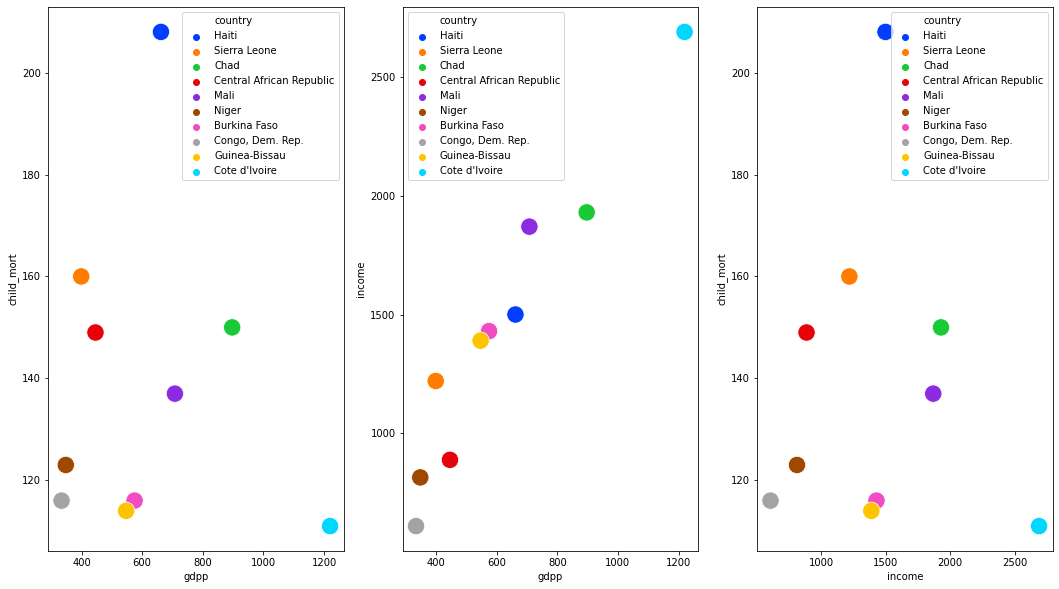

In [ ]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

In [ ]:
UDC_top_10.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
#Scaling to represent in graph

# Numeric Variables only for scaling
UDC_num=UDC_top_10[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler_UDC = StandardScaler()
UDC_scaled = scaler_UDC.fit_transform(UDC_num)


UDC_scaled = pd.DataFrame(UDC_scaled)

In [ ]:
# Converting it into a dataframe

UDC_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
                      'inflation', 'life_expec', 'total_fer', 'gdpp']

In [ ]:
# Insert Country Names
UDC_scaled['country']=UDC_top_10['country']

### **Visualising GDPP vs Child Mortality for top 10 Under Developed Countries**

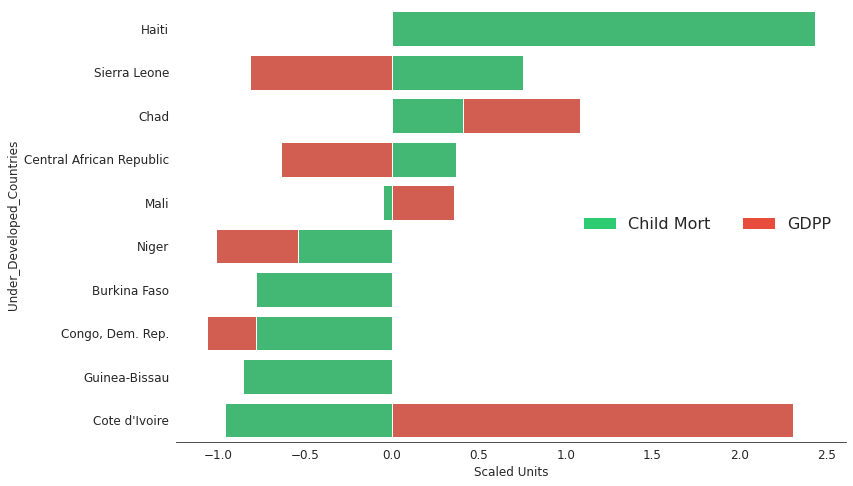

In [ ]:
# Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 8)})

# Plot 1 - background - top series
sns.barplot(x='gdpp', y='country', data=UDC_scaled, color="#e74c3c")

# Plot 2 - overlay - bottom series
bottom_plot = sns.barplot(x='child_mort', y='country', data=UDC_scaled, color="#2ecc71")


topbar = plt.Rectangle((0, 0), 1, 1, fc="#e74c3c", edgecolor='none')
bottombar = plt.Rectangle((0, 0), 1, 1, fc='#2ecc71',  edgecolor='none')
l = plt.legend([bottombar, topbar], ['Child Mort','GDPP'],
               loc=5, ncol=2, prop={'size': 16})
l.draw_frame(False)

# Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Under_Developed_Countries")
bottom_plot.set_xlabel("Scaled Units")

# Set fonts to consistent 12pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(12)

### **Visualising the Child Mortality vs GDPP vs Income**

**We will plot against all cluster mean values**

In [ ]:
# All Cluster means
    
all_cluster_mean=country_x_analysis.groupby(['cluster_id_4']).mean()

In [ ]:
all_cluster_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4,cluster_id_3,Observations,Proportion
cluster_id_4,,,,,,,,,,,,,,
Developed Countries_1,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,2.000000,2.000000,0.000000,3,0.02
Developed Countries_2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333,1.000000,1.000000,0.000000,30,0.18
Developing Countries,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448,0.873563,0.873563,1.931034,87,0.52
Under Developed Countries,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979,0.063830,0.127660,1.000000,47,0.28


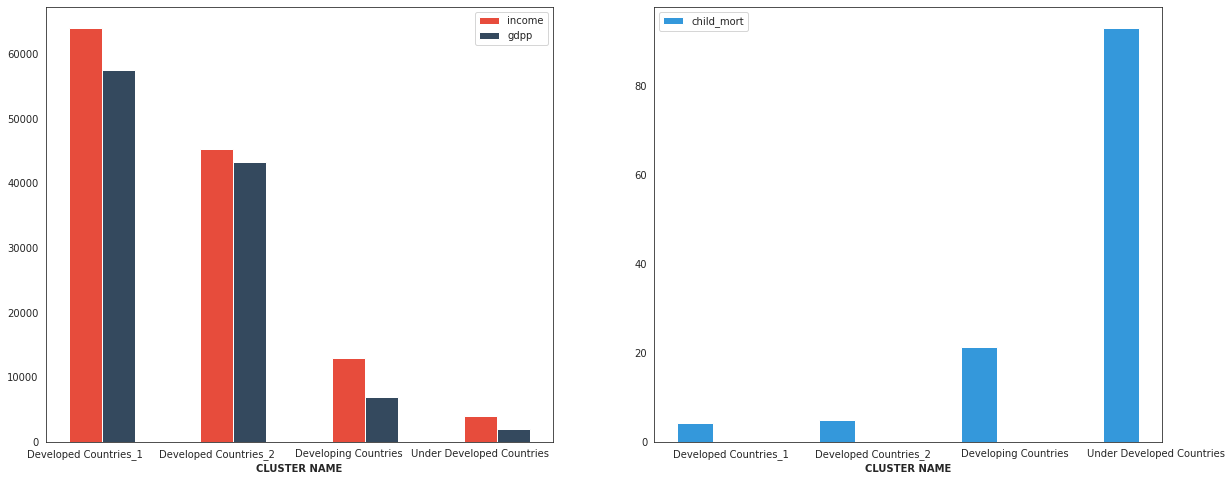

In [ ]:
plt.figure(figsize=(20, 8))
 
# set width of bar
barWidth = 0.25
 
# # set height of bar
bars1 = [4.133333,4.953333,21.389655,92.961702]
bars2 = [64033.333333,45250.000000,12968.620690,3942.404255]
bars3 = [57566.666667,43333.333333,6919.103448,1922.382979]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.subplot(1, 2, 1)
plt.bar(r2, bars2, color='#e74c3c', width=barWidth, edgecolor='white', label='income')
plt.bar(r3, bars3, color='#34495e', width=barWidth, edgecolor='white', label='gdpp')

# Add xticks on the middle of the group bars
plt.xlabel('CLUSTER NAME', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Developed Countries_1','Developed Countries_2','Developing Countries','Under Developed Countries'])
plt.legend() 

plt.subplot(1, 2, 2)
plt.bar(r1, bars1, color='#3498db', width=barWidth, edgecolor='white', label='child_mort')
 
# Add xticks on the middle of the group bars
plt.xlabel('CLUSTER NAME', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Developed Countries_1','Developed Countries_2','Developing Countries','Under Developed Countries'])
plt.legend() 
 
# Create legend & Show graphic
plt.show()

## **Conclusion**

We performed **CLUSTERING** on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. Based on our Clustering Analysis, we have below the top countries under our **'Under Developed Countries'** cluster which are in dire need of the Financial Aid. This output is purely based on the dataset we used and various analytical methodology we performed. 

In [ ]:
#TOP COUNTRIES recommended for Financial Aid

UDC_top_10[['country']]

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Burkina Faso
7,"Congo, Dem. Rep."
8,Guinea-Bissau
9,Cote d'Ivoire
